**ОПЕРАЦИИ С ВЕКТОРАМИ**

In [5]:
import math

Скалярное произведение двух векторов

In [2]:
# метод вычисление скалярного произведения двух векторов
def scalar_mul(vec1, vec2):
    if len(vec1) < len(vec2):
        length = len(vec2)
    else:
        length = len(vec1)

    res = 0
    for i in range(0, length):
        res += vec1[i] * vec2[i]

    return res

Евклидова норма вектора

In [3]:
# метод вычисления Евклидовой нормы вектора.
def euclidean_norm(vec):
    return math.sqrt(scalar_mul(vec, vec))

Тест

In [29]:
v1 = [1, 2, 3]
v2 = [-3, 2, 1]
print(f'scalar mul: {scalar_mul(v1, v2)}')

scalar mul: 4


In [30]:
print(f'Euclidean norm v1: {euclidean_norm(v1)}')
print(f'Euclidean norm v2: {euclidean_norm(v2)}')

Euclidean norm v1: 3.7416573867739413
Euclidean norm v2: 3.7416573867739413


**ОПЕРАЦИИ С МАТРИЦАМИ**

Умножение матрицы на матрицу

In [27]:
# умножение матрицы на матрицу
def mul_on_matrix(matrix1, matrix2):
    rows_matrix1 = len(matrix1)
    cols_matrix1 = len(matrix1[0])
    cols_matrix2 = len(matrix2[0])
    rows_matrix2 = len(matrix2)

    if rows_matrix1 != cols_matrix2:
        err_str = 'Ошибка: Не удается умножить матрицы, несовместимые размеры'
        return f'{err_str} {rows_matrix1}x{cols_matrix1} и {rows_matrix2}x{cols_matrix2}'
    else:
        res = []
        for i in range(0, rows_matrix1):
            tmp = []
            for j in range(0, cols_matrix2):
                el = 0
                for k in range(cols_matrix1):
                    el += matrix1[i][k] * matrix2[k][j]
                tmp.append(el)
            res.append(tmp)
        return res

Умножение матрицы на вектор

In [8]:
# умножение матрицы на вектор
def mul_on_vector(matrix, vector):
    res = []
    for i in range(len(matrix)):
        el = 0
        for j in range(len(vector)):
            el += matrix[i][j] * vector[j]
        res.append(el)
    return res

Транспонирование матрицы

In [9]:
# транспонирование матрицы
def transpose_matrix(matrix):
    transposed = [[0 for j in range(len(matrix))] for i in range(len(matrix[0]))]
    for i in range(len(matrix)):
         for j in range(len(matrix[0])):
              transposed[j][i] = matrix[i][j]
    return transposed

Тест

In [11]:
mat = [[1, 2, 4], [31, 17, 15]]
print(mat)
print(f'\ntransposed matrix:\n{transpose_matrix(mat)}')

[[1, 2, 4], [31, 17, 15]]

transposed matrix:
[[1, 31], [2, 17], [4, 15]]


In [12]:
mat = [[2, 4, 0], [-2, 1, 3], [-1, 0, 1]]
vec = [1, 2, -1]
print(f'\nmultiply matrix on vector:\n{mul_on_vector(mat, vec)}')


multiply matrix on vector:
[10, -3, -2]


In [28]:
mat1 = [[1, 2, 1], [0, 1, 2]]
mat2 = [[1, 0], [0, 1], [1, 1]]
print(f'\nmultiply matrix1 on matrix2:\n{mul_on_matrix(mat1, mat2)}')
print(f'\nmultiply matrix2 on matrix1:\n{mul_on_matrix(mat2, mat1)}')
print(f'\nmultiply matrix1 on matrix1:\n{mul_on_matrix(mat1, mat1)}')


multiply matrix1 on matrix2:
[[2, 3], [2, 3]]

multiply matrix2 on matrix1:
[[1, 2, 1], [0, 1, 2], [1, 3, 3]]

multiply matrix1 on matrix1:
Ошибка: Не удается умножить матрицы, несовместимые размеры 2x3 и 2x3


**ПОСТРОЕНИЕ ГРАФИКА**

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# метод построения графика произвольной функции от
# одной переменной.
def show_chart(func, x_0, x_n):
    xs = np.linspace(x_0, x_n)
    ys = func(xs)
    figure, axs = plt.subplots()
    axs.plot(xs, ys)
    axs.set_xlim(x_0, x_n)
    plt.plot(xs, ys)
    plt.show()

В качестве произвольной функции от
одной переменной выбрана функция f(x) = x^2

In [16]:
def f(x):
    return x ** 2

Тест

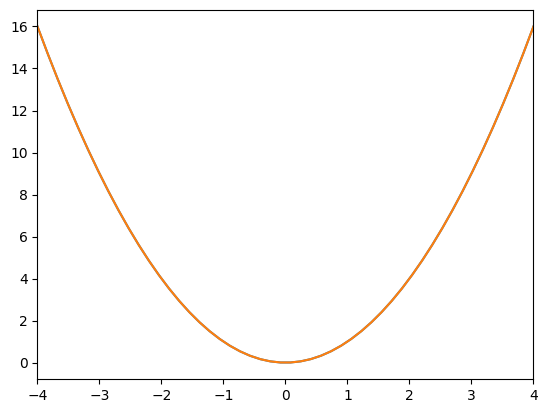

In [19]:
show_chart(f, -4, 4)

**ОЦЕНКА ПОГРЕШНОСТИ ВЫЧИСЛЕНИЯ ОБЪЕМА ШАРА, ЗАЖАТОГО ЦИЛИНДРОМ**

In [20]:
# Реализовать оценку погрешности вычисления объема шара зажатого
# цилиндром тремя способами при двух различных приближениях
# вычисления значения 2^0.5: 7/5 и 17/12
import math

def relative_error(counted, correct):
    return abs(correct - counted) / correct

# S = (sqrt(2) - 1) / (sqrt(2) + 1)
# точное значение S
correct_s = 0.005051

# три способа вычисления S
sss = [
    lambda sqrt : (sqrt - 1)**6 ,
    lambda sqrt : (3 - 2 * sqrt)**3 ,
    lambda sqrt : (99 - 70 * sqrt)
]

# аппроксимации корня из 2
approx_sqrt_2 = [math.sqrt(2), 7/5 , 17/12]

In [21]:
# погрешность вычисления корня из 2
print(relative_error(7/5, math.sqrt(2)))
print(relative_error(17/12, math.sqrt(2)))

0.010050506338833596
0.00173460668094231


In [22]:
# вычисление S тремя способами при различных приближениях корня из 2
for i , sqrt in enumerate(approx_sqrt_2):
    s_i = []
    for j, f in enumerate(sss):
        s_i.append(f(sqrt))
    print(s_i)

[0.005050633883346591, 0.005050633883346567, 0.005050633883342925]
[0.004095999999999995, 0.008000000000000021, 1.0]
[0.005232780885631007, 0.004629629629629617, -0.1666666666666714]


In [24]:
# погрешность вычисления объема шара при двух приближениях
# вычисления значения 2^0.5: 7/5 и 17/12
for j, f in enumerate(sss):
    print(relative_error(f(7/5), correct_s))

print()

for j, f in enumerate(sss):
    print(relative_error(f(17/12), correct_s))

0.18907147099584345
0.5838447832112494
196.98059790140567

0.03598908842427385
0.08342315786386512
33.99676631690188
